In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# function to set timestamp on output file
def get_dt():
    dt_stamp = dt.datetime.now()
    dt_stamp = dt_stamp.strftime("%Y_%m_%d_%H%M%S")
    dt_stamp = str(dt_stamp).split(".")[0]
    return dt_stamp

In [3]:
# Define a function to create Linear Regression plots
def lin_reg(x, y):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), 'r')

In [4]:
# Import combined breast cancer incident/mortality data based on Income and Unemployment Rate

per_state = pd.read_csv("Resources/clean_data_2023_06_17_184123.csv")
per_state

,Year,State,Race,Median Household Income,Total Population,Unemployment Rate,Incidence,Mortality
0,2015,Alabama,Non-Hispanic Black,44765,3807670,6.1,886,200
1,2015,Alabama,Hispanic,44765,3807670,6.1,30,0
2,2015,Alabama,Non-Hispanic White,44765,3807670,6.1,2689,472
3,2015,Alaska,Non-Hispanic Black,73355,544288,6.4,12,0
4,2015,Alaska,Hispanic,73355,544288,6.4,13,0
...,...,...,...,...,...,...,...,...
580,2019,Washington,Hispanic,78687,6070251,3.8,267,29
581,2019,Washington,Non-Hispanic White,78687,6070251,3.8,4895,778
582,2019,Wisconsin,Non-Hispanic Black,64168,4684115,3.1,234,43
583,2019,Wisconsin,Hispanic,64168,4684115,3.1,104,10


In [5]:
# Filter DatFrame for just Texas Ethnicity incidents
texas = per_state.loc[per_state["State"] == "Texas"]
texas_incidents = texas.groupby(["Year", "Race"])["Incidence"].sum().unstack()
texas_incidents = texas_incidents[["Non-Hispanic White", "Non-Hispanic Black", "Hispanic"]]
texas_incidents

Race,Non-Hispanic White,Non-Hispanic Black,Hispanic
Year,,,
2015,9728,1883,3405
2016,9926,1952,3551
2017,10103,2000,3701
2018,10370,2053,3847
2019,10638,2151,4061


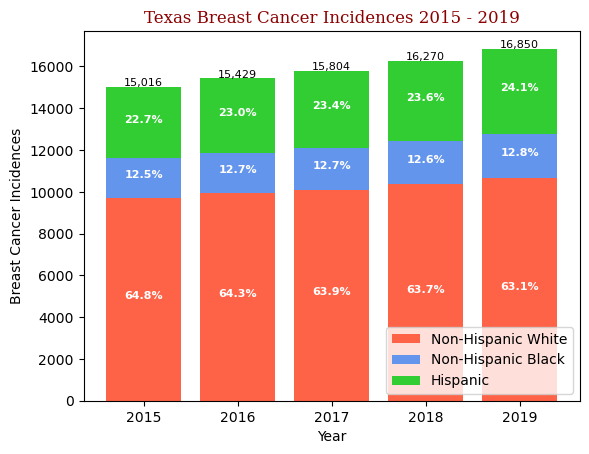

In [49]:
# Plot of cases each year based on ethnicity

font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

fig, ax = plt.subplots()

colors = ['tomato', 'cornflowerblue', 'limegreen']
bottom = np.zeros(len(texas_incidents))

for i, col in enumerate(texas_incidents.columns):
    ax.bar(texas_incidents.index, texas_incidents[col], bottom=bottom, label=col, color=colors[i])
    bottom += np.array(texas_incidents[col])

totals = texas_incidents.sum(axis=1)
y_offset = 50

for i, total in enumerate(totals):
    ax.text(totals.index[i], total + y_offset, f'{round(total):,.0f}', ha='center', size=8)

# Add percentages as labels
for idx in texas_incidents.index:
    start = 0
    for col in texas_incidents.columns:
        y = texas_incidents.loc[idx, col]
        value = texas_incidents.loc[idx, col]
        total = texas_incidents.loc[idx, :].sum()
        ax.text(
            x=idx,
            y=start + y / 2,
            s=f"{round(100 * value / total, 1)}%",
            fontsize=8,
            weight='bold',
            ha="center",
            color="w",
        )
        start += y

ax.set_title('Texas Breast Cancer Incidences 2015 - 2019', fontdict=font)
ax.set_xlabel('Year')
ax.set_ylabel('Breast Cancer Incidences')
ax.legend(loc='lower right')

plt.savefig("Figures/1_TX_Incidences.png")

plt.show()

In [50]:
# Filter DatFrame for just Texas Ethnicity mortality
texas_mortality = texas.groupby(["Year", "Race"])["Mortality"].sum().unstack()
texas_mortality = texas_mortality[["Non-Hispanic White", "Non-Hispanic Black", "Hispanic"]]
texas_mortality

Race,Non-Hispanic White,Non-Hispanic Black,Hispanic
Year,,,
2015,1710,451,542
2016,1733,454,571
2017,1746,451,587
2018,1777,470,603
2019,1798,492,625


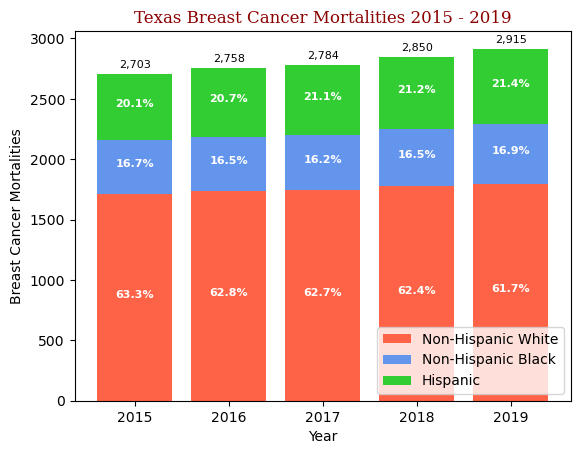

In [51]:
# Plot of mortalities each year based on ethnicity

font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

fig, ax = plt.subplots()

colors = ['tomato', 'cornflowerblue', 'limegreen']
bottom = np.zeros(len(texas_mortality))

for i, col in enumerate(texas_mortality.columns):
    ax.bar(texas_mortality.index, texas_mortality[col], bottom=bottom, label=col, color=colors[i])
    bottom += np.array(texas_mortality[col])

totals = texas_mortality.sum(axis=1)
y_offset = 50

for i, total in enumerate(totals):
    ax.text(totals.index[i], total + y_offset, f'{round(total):,.0f}', ha='center', size=8)

# Add percentages as labels
for idx in texas_mortality.index:
    start = 0
    for col in texas_mortality.columns:
        y = texas_mortality.loc[idx, col]
        value = texas_mortality.loc[idx, col]
        total = texas_mortality.loc[idx, :].sum()
        ax.text(
            x=idx,
            y=start + y / 2,
            s=f"{round(100 * value / total, 1)}%",
            fontsize=8,
            weight='bold',
            ha="center",
            color="w",
        )
        start += y

ax.set_title('Texas Breast Cancer Mortalities 2015 - 2019', fontdict=font)
ax.set_xlabel('Year')
ax.set_ylabel('Breast Cancer Mortalities')
ax.legend(loc='lower right')

plt.savefig("Figures/1_TX_Mortalities.png")

plt.show()

In [52]:
texas

,Year,State,Race,Median Household Income,Total Population,Unemployment Rate,Incidence,Mortality
102,2015,Texas,Non-Hispanic Black,55653,20696766,4.5,1883,451
103,2015,Texas,Hispanic,55653,20696766,4.5,3405,542
104,2015,Texas,Non-Hispanic White,55653,20696766,4.5,9728,1710
219,2016,Texas,Non-Hispanic Black,56565,21076258,4.8,1952,454
220,2016,Texas,Hispanic,56565,21076258,4.8,3551,571
221,2016,Texas,Non-Hispanic White,56565,21076258,4.8,9926,1733
336,2017,Texas,Non-Hispanic Black,59206,21280466,4.1,2000,451
337,2017,Texas,Hispanic,59206,21280466,4.1,3701,587
338,2017,Texas,Non-Hispanic White,59206,21280466,4.1,10103,1746
453,2018,Texas,Non-Hispanic Black,60629,21596639,3.8,2053,470


In [53]:
texas_no_race = texas.groupby([
    "Year", "Median Household Income", "Total Population", 
    "Unemployment Rate"], as_index=False).agg({"Incidence":"sum", "Mortality":"sum"})

texas_no_race 

,Year,Median Household Income,Total Population,Unemployment Rate,Incidence,Mortality
0,2015,55653,20696766,4.5,15016,2703
1,2016,56565,21076258,4.8,15429,2758
2,2017,59206,21280466,4.1,15804,2784
3,2018,60629,21596639,3.8,16270,2850
4,2019,64034,21943443,3.5,16850,2915


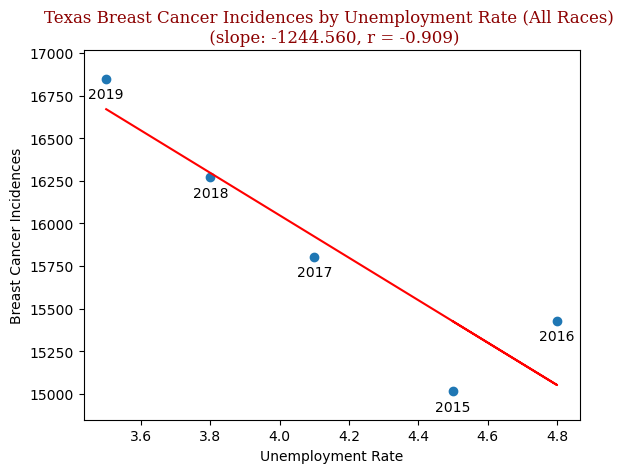

In [110]:
# Plot of texas_no_race breast cancer cases by unemployment rate

font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

fig = plt.figure()
# fig.subplots_adjust(wspace=.2, top=.85, bottom=.4)

ax = fig.add_subplot()
x = texas_no_race['Unemployment Rate']
y = texas_no_race['Incidence']
ax.scatter(x, y)
lin_reg(np.array(texas_no_race['Unemployment Rate']), np.array(texas_no_race['Incidence']))
r, p = st.pearsonr(np.array(texas_no_race['Unemployment Rate']), np.array(texas_no_race['Incidence']))
z = np.polyfit(np.array(texas_no_race['Unemployment Rate']), np.array(texas_no_race['Incidence']), 1)
ax.set_title(f'Texas Breast Cancer Incidences by Unemployment Rate (All Races) \n (slope: {z[0]:.3f}, r = {r:.3f})', fontdict=font)
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Breast Cancer Incidences')
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin-75, ymax+75)

for i1, i2, years in zip(texas_no_race["Unemployment Rate"], texas_no_race["Incidence"]-50, texas_no_race["Year"]):
        plt.text(i1, i2, f"{years}", va="top", ha="center")

plt.savefig("Figures/2_TX_Unemploy_All.png")

# fig.tight_layout()
plt.show()

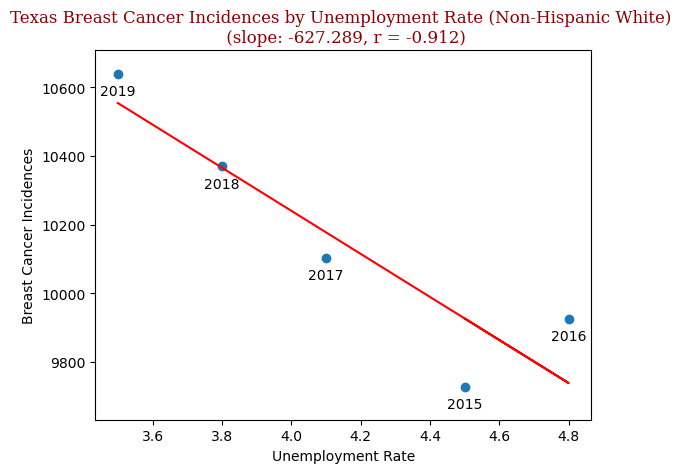

In [106]:
# Plot of texas breast cancer cases by unemployment rate (Non-Hispanic White)

font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

fig = plt.figure()
# fig.subplots_adjust(wspace=.2, top=.85, bottom=.4)

ax = fig.add_subplot()
x = texas.loc[texas["Race"] == "Non-Hispanic White", 'Unemployment Rate']
y = texas.loc[texas["Race"] == "Non-Hispanic White", 'Incidence']
ax.scatter(x, y)
lin_reg(np.array(texas.loc[texas['Race'] == 'Non-Hispanic White', 'Unemployment Rate']),
         np.array(texas.loc[texas['Race'] == 'Non-Hispanic White', 'Incidence']))
r, p = st.pearsonr(np.array(texas.loc[texas['Race'] == 'Non-Hispanic White', 'Unemployment Rate']),
                    np.array(texas.loc[texas['Race'] == 'Non-Hispanic White', 'Incidence']))
z = np.polyfit(np.array(texas.loc[texas['Race'] == 'Non-Hispanic White', 'Unemployment Rate']),
                np.array(texas.loc[texas['Race'] == 'Non-Hispanic White', 'Incidence']), 1)
ax.set_title(f'Texas Breast Cancer Incidences by Unemployment Rate (Non-Hispanic White) \n (slope: {z[0]:.3f}, r = {r:.3f})', fontdict=font)
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Breast Cancer Incidences')
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin-50, ymax+25)

for i1, i2, years in zip(x, y-30, (texas.loc[texas["Race"] == "Non-Hispanic White", "Year"])):
        plt.text(i1, i2, f"{years}", va="top", ha="center")

plt.savefig("Figures/2_TX_Unemploy_White.png")

# fig.tight_layout()
plt.show()

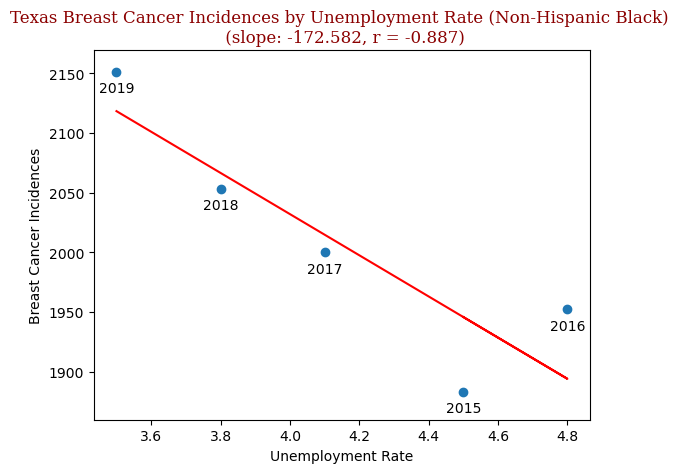

In [99]:
# Plot of texas breast cancer cases by unemployment rate (Non-Hispanic Black)

font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

fig = plt.figure()
# fig.subplots_adjust(wspace=.2, top=.85, bottom=.4)

ax = fig.add_subplot()
x = texas.loc[texas["Race"] == "Non-Hispanic Black", 'Unemployment Rate']
y = texas.loc[texas["Race"] == "Non-Hispanic Black", 'Incidence']
ax.scatter(x, y)
lin_reg(np.array(texas.loc[texas['Race'] == 'Non-Hispanic Black', 'Unemployment Rate']),
         np.array(texas.loc[texas['Race'] == 'Non-Hispanic Black', 'Incidence']))
r, p = st.pearsonr(np.array(texas.loc[texas['Race'] == 'Non-Hispanic Black', 'Unemployment Rate']),
                    np.array(texas.loc[texas['Race'] == 'Non-Hispanic Black', 'Incidence']))
z = np.polyfit(np.array(texas.loc[texas['Race'] == 'Non-Hispanic Black', 'Unemployment Rate']),
                np.array(texas.loc[texas['Race'] == 'Non-Hispanic Black', 'Incidence']), 1)
ax.set_title(f'Texas Breast Cancer Incidences by Unemployment Rate (Non-Hispanic Black) \n (slope: {z[0]:.3f}, r = {r:.3f})', fontdict=font)
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Breast Cancer Incidences')
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin-10, ymax+5)

for i1, i2, years in zip(x, y-8, (texas.loc[texas["Race"] == "Non-Hispanic Black", "Year"])):
        plt.text(i1, i2, f"{years}", va="top", ha="center")

plt.savefig("Figures/2_TX_Unemploy_Black.png")

# fig.tight_layout()
plt.show()

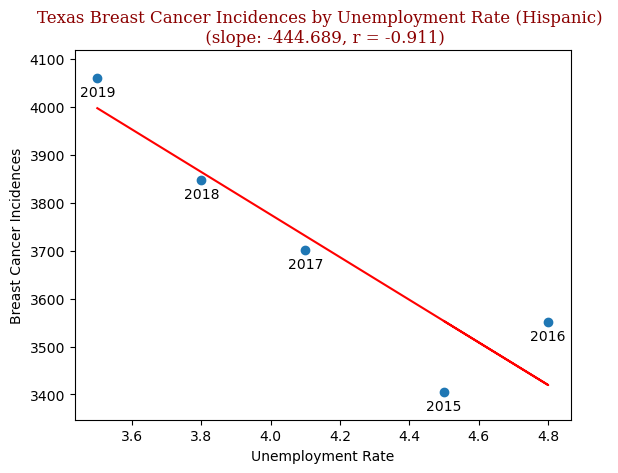

In [95]:
# Plot of texas breast cancer cases by unemployment rate (Hispanic)

font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

fig = plt.figure()
# fig.subplots_adjust(wspace=.2, top=.85, bottom=.4)

ax = fig.add_subplot()
x = texas.loc[texas["Race"] == "Hispanic", 'Unemployment Rate']
y = texas.loc[texas["Race"] == "Hispanic", 'Incidence']
ax.scatter(x, y)
lin_reg(np.array(texas.loc[texas['Race'] == 'Hispanic', 'Unemployment Rate']),
         np.array(texas.loc[texas['Race'] == 'Hispanic', 'Incidence']))
r, p = st.pearsonr(np.array(texas.loc[texas['Race'] == 'Hispanic', 'Unemployment Rate']),
                    np.array(texas.loc[texas['Race'] == 'Hispanic', 'Incidence']))
z = np.polyfit(np.array(texas.loc[texas['Race'] == 'Hispanic', 'Unemployment Rate']),
                np.array(texas.loc[texas['Race'] == 'Hispanic', 'Incidence']), 1)
ax.set_title(f'Texas Breast Cancer Incidences by Unemployment Rate (Hispanic) \n (slope: {z[0]:.3f}, r = {r:.3f})', fontdict=font)
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Breast Cancer Incidences')
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin-25, ymax+25)

for i1, i2, years in zip(x, y-15, (texas.loc[texas["Race"] == "Hispanic", "Year"])):
        plt.text(i1, i2, f"{years}", va="top", ha="center")

plt.savefig("Figures/2_TX_Unemploy_Hispanic.png")

# fig.tight_layout()
plt.show()

---

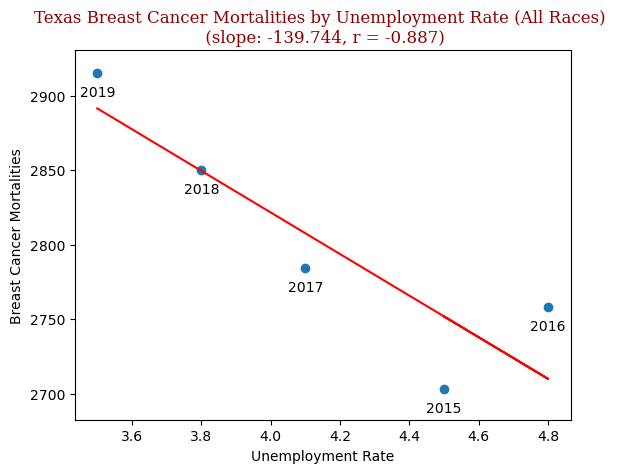

In [91]:
# Plot of texas_no_race breast cancer mortalities by unemployment rate

font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

fig = plt.figure()
# fig.subplots_adjust(wspace=.2, top=.85, bottom=.4)

ax = fig.add_subplot()
x = texas_no_race['Unemployment Rate']
y = texas_no_race['Mortality']
ax.scatter(x, y)
lin_reg(np.array(texas_no_race['Unemployment Rate']), np.array(texas_no_race['Mortality']))
r, p = st.pearsonr(np.array(texas_no_race['Unemployment Rate']), np.array(texas_no_race['Mortality']))
z = np.polyfit(np.array(texas_no_race['Unemployment Rate']), np.array(texas_no_race['Mortality']), 1)
ax.set_title(f'Texas Breast Cancer Mortalities by Unemployment Rate (All Races) \n (slope: {z[0]:.3f}, r = {r:.3f})', fontdict=font)
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Breast Cancer Mortalities')
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin-10, ymax+5)

for i1, i2, years in zip(texas_no_race["Unemployment Rate"], texas_no_race["Mortality"]-8, texas_no_race["Year"]):
        plt.text(i1, i2, f"{years}", va="top", ha="center")

plt.savefig("Figures/3_TX_Mort_All.png")

# fig.tight_layout()
plt.show()

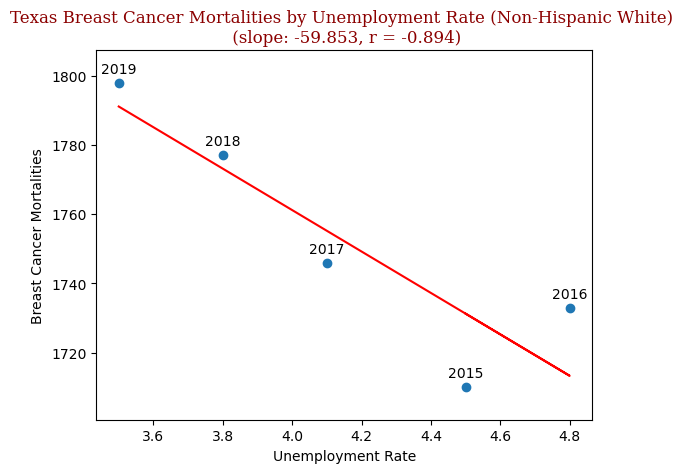

In [86]:
# Plot of texas breast cancer mortalities by unemployment rate (Non-Hispanic White)

font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

fig = plt.figure()
# fig.subplots_adjust(wspace=.2, top=.85, bottom=.4)

ax = fig.add_subplot()
x = texas.loc[texas["Race"] == "Non-Hispanic White", 'Unemployment Rate']
y = texas.loc[texas["Race"] == "Non-Hispanic White", 'Mortality']
ax.scatter(x, y)
lin_reg(np.array(texas.loc[texas['Race'] == 'Non-Hispanic White', 'Unemployment Rate']),
         np.array(texas.loc[texas['Race'] == 'Non-Hispanic White', 'Mortality']))
r, p = st.pearsonr(np.array(texas.loc[texas['Race'] == 'Non-Hispanic White', 'Unemployment Rate']),
                    np.array(texas.loc[texas['Race'] == 'Non-Hispanic White', 'Mortality']))
z = np.polyfit(np.array(texas.loc[texas['Race'] == 'Non-Hispanic White', 'Unemployment Rate']),
                np.array(texas.loc[texas['Race'] == 'Non-Hispanic White', 'Mortality']), 1)
ax.set_title(f'Texas Breast Cancer Mortalities by Unemployment Rate (Non-Hispanic White) \n (slope: {z[0]:.3f}, r = {r:.3f})', fontdict=font)
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Breast Cancer Mortalities')
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin-5, ymax+5)

for i1, i2, years in zip(x, y+4, (texas.loc[texas["Race"] == "Non-Hispanic White", "Year"])):
        plt.text(i1, i2, f"{years}", va="center", ha="center")

plt.savefig("Figures/3_TX_Mort_White.png")

# fig.tight_layout()
plt.show()

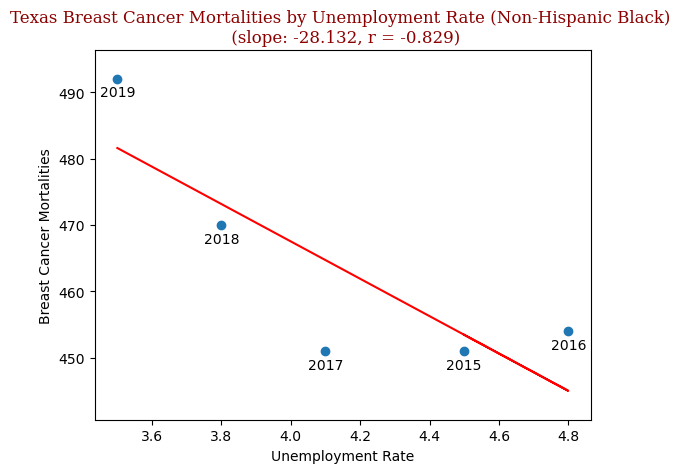

In [74]:
# Plot of texas breast cancer mortalities by unemployment rate (Non-Hispanic Black)

font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

fig = plt.figure()
# fig.subplots_adjust(wspace=.2, top=.85, bottom=.4)

ax = fig.add_subplot()
x = texas.loc[texas["Race"] == "Non-Hispanic Black", 'Unemployment Rate']
y = texas.loc[texas["Race"] == "Non-Hispanic Black", 'Mortality']
ax.scatter(x, y)
lin_reg(np.array(texas.loc[texas['Race'] == 'Non-Hispanic Black', 'Unemployment Rate']),
         np.array(texas.loc[texas['Race'] == 'Non-Hispanic Black', 'Mortality']))
r, p = st.pearsonr(np.array(texas.loc[texas['Race'] == 'Non-Hispanic Black', 'Unemployment Rate']),
                    np.array(texas.loc[texas['Race'] == 'Non-Hispanic Black', 'Mortality']))
z = np.polyfit(np.array(texas.loc[texas['Race'] == 'Non-Hispanic Black', 'Unemployment Rate']),
                np.array(texas.loc[texas['Race'] == 'Non-Hispanic Black', 'Mortality']), 1)
ax.set_title(f'Texas Breast Cancer Mortalities by Unemployment Rate (Non-Hispanic Black) \n (slope: {z[0]:.3f}, r = {r:.3f})', fontdict=font)
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Breast Cancer Mortalities')
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin-2, ymax+2)

for i1, i2, years in zip(x, y-1, (texas.loc[texas["Race"] == "Non-Hispanic Black", "Year"])):
        plt.text(i1, i2, f"{years}", va="top", ha="center")

plt.savefig("Figures/3_TX_Mort_Black.png")

# fig.tight_layout()
plt.show()

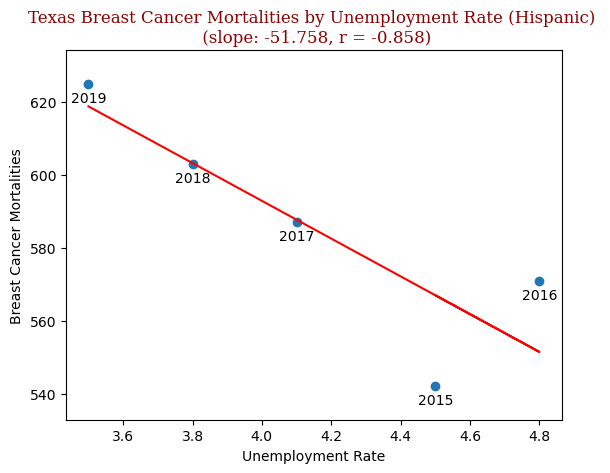

In [72]:
# Plot of texas breast cancer mortalities by unemployment rate (Hispanic)

font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

fig = plt.figure()
# fig.subplots_adjust(wspace=.2, top=.85, bottom=.4)

ax = fig.add_subplot()
x = texas.loc[texas["Race"] == "Hispanic", 'Unemployment Rate']
y = texas.loc[texas["Race"] == "Hispanic", 'Mortality']
ax.scatter(x, y)
lin_reg(np.array(texas.loc[texas['Race'] == 'Hispanic', 'Unemployment Rate']),
         np.array(texas.loc[texas['Race'] == 'Hispanic', 'Mortality']))
r, p = st.pearsonr(np.array(texas.loc[texas['Race'] == 'Hispanic', 'Unemployment Rate']),
                    np.array(texas.loc[texas['Race'] == 'Hispanic', 'Mortality']))
z = np.polyfit(np.array(texas.loc[texas['Race'] == 'Hispanic', 'Unemployment Rate']),
                np.array(texas.loc[texas['Race'] == 'Hispanic', 'Mortality']), 1)
ax.set_title(f'Texas Breast Cancer Mortalities by Unemployment Rate (Hispanic) \n (slope: {z[0]:.3f}, r = {r:.3f})', fontdict=font)
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Breast Cancer Mortalities')
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin-5, ymax+5)

for i1, i2, years in zip(x, y-2, (texas.loc[texas["Race"] == "Hispanic", "Year"])):
        plt.text(i1, i2, f"{years}", va="top", ha="center")

plt.savefig("Figures/3_TX_Mort_Hispanic.png")

# fig.tight_layout()
plt.show()